In [90]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
sns.set()

In [91]:
fp=pd.read_csv(r"C:\Users\Jarvis\Desktop\Project_ML_IIT_K\House_Prediction.csv",sep=r'\s*,\s*',
                           header=0, engine='python')

fp.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,SÃ£o Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,SÃ£o Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,SÃ£o Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [92]:
#checking for null and nan is present in dataset or not.
#checking size and shape of datasets
print("--------------------------------------------------------")
print("Checking NULL value , size and shape of Data Sets")
print("--------------------------------------------------------")
print(fp.isna().values.any())
print(fp.size)
print(fp.shape)
print(fp.info())
print("--------------------------------------------------------")


--------------------------------------------------------
Checking NULL value , size and shape of Data Sets
--------------------------------------------------------
False
138996
(10692, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 

In [93]:
#checking unique values in certain columns for one hot encoding for trainig datasets well
# Doing  data cleaning 
print("Checking unique values in certain columns")
print("--------------------------------------------------------")
print(fp['city'].unique())
print(fp['animal'].unique())
print(fp['furniture'].unique())
print(fp['floor'].unique())
len(fp)

#making a list of missing values in Datasets
missing_values=['-']
fp=pd.read_csv(r"C:\Users\Jarvis\Desktop\Project_ML_IIT_K\House_Prediction.csv",na_values=missing_values)
fp.isna().values.any()
fp.isna().sum()
print("--------------------------------------------------------")
# Replacing - in floor by 0 as ground floor
fp['floor'].replace('-',np.nan)
fp['floor'].fillna(0,inplace=True)





Checking unique values in certain columns
--------------------------------------------------------
['SÃ£o Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
['acept' 'not acept']
['furnished' 'not furnished']
['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
--------------------------------------------------------


In [94]:
#looking statistics and data types of datasets
fp.describe()

#changing data type of floor into integer
fp['floor']=fp['floor'].astype(np.int64)
#fp.head(20)
#fp.dtypes

In [95]:
# use labelencoder to transform text to number
import sklearn.preprocessing as prep
le=prep.LabelEncoder()
fp["animal"]=le.fit_transform(fp["animal"].astype(str))
fp["furniture"]=le.fit_transform(fp["furniture"].astype(str))
fp["furniture"]=fp["furniture"].astype(np.int64)
fp.dtypes

city               object
area                int64
rooms               int64
bathroom            int64
parking spaces      int64
floor               int64
animal              int32
furniture           int64
hoa                 int64
rent amount         int64
property tax        int64
fire insurance      int64
total               int64
dtype: object

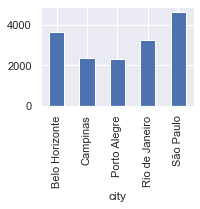

In [96]:
fp=fp.rename(columns = {'rent amount ':'rent','parking spaces':'parking','property tax ':'tax',
                        'fire insurance ':'insurance','Porto Alegre':'porto','Belo Horizonte':'belo','total ':'total'
                       })
#visualsation of features

import statistics as st
plt.subplot(2, 2, 1)
fp.groupby('city').rent.mean().plot(kind='bar')




Text(0.5, 1.0, 'city vs mean of parking')

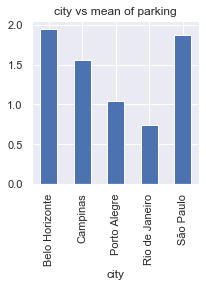

In [97]:
f,ax=plt.subplots(figsize=(3,3))
fp.groupby('city').parking.mean().plot(kind='bar')
plt.title('city vs mean of parking')


Text(0.5, 1.0, 'city vs mean of floor')

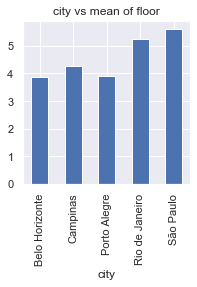

In [98]:
f,ax=plt.subplots(figsize=(3,3))
fp.groupby('city').floor.mean().plot(kind='bar')
plt.title('city vs mean of floor')


Text(0.5, 1.0, 'city vs mean of insurance')

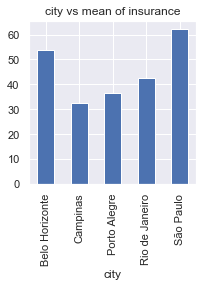

In [99]:
f,ax=plt.subplots(figsize=(3,3))
fp.groupby('city').insurance.mean().plot(kind='bar')
plt.title('city vs mean of insurance')


Text(0.5, 1.0, 'city vs mean of bathroom')

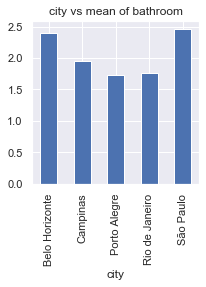

In [100]:
f,ax=plt.subplots(figsize=(3,3))
fp.groupby('city').bathroom.mean().plot(kind='bar')
plt.title('city vs mean of bathroom')


Text(0.5, 1.0, 'city vs mean of rooms')

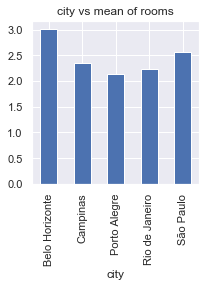

In [101]:
f,ax=plt.subplots(figsize=(3,3))
fp.groupby('city').rooms.mean().plot(kind='bar')
plt.title('city vs mean of rooms')


Text(0.5, 1.0, 'city vs mean of area')

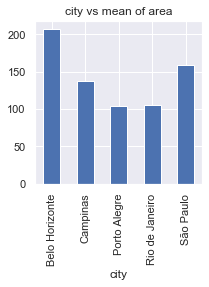

In [102]:
f,ax=plt.subplots(figsize=(3,3))
fp.groupby('city').area.mean().plot(kind='bar')
plt.title('city vs mean of area')


Text(0.5, 1.0, 'city vs mean of total')

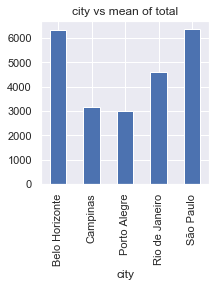

In [103]:
f,ax=plt.subplots(figsize=(3,3))
fp.groupby('city').total.mean().plot(kind='bar')
plt.title('city vs mean of total')



In [104]:
#one hot encoding
dummies=pd.get_dummies(fp.city)

In [105]:
merged=pd.concat([dummies,fp],axis='columns')
df=merged.drop(['city','São Paulo','Rio de Janeiro'],axis='columns')
df=df.rename(columns = {'rent amount ':'rent','parking spaces':'parking','property tax ':'tax',
                        'fire insurance ':'insurance','Porto Alegre':'porto','Belo Horizonte':'belo','total ':'total'
                       })

df.head()


,belo,Campinas,porto,area,rooms,bathroom,parking,floor,animal,furniture,hoa,rent,tax,insurance,total
0,0,0,0,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,0,0,0,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,0,0,1,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,0,0,1,51,2,1,0,2,0,1,270,1112,22,17,1421
4,0,0,0,25,1,1,0,1,1,1,0,800,25,11,836


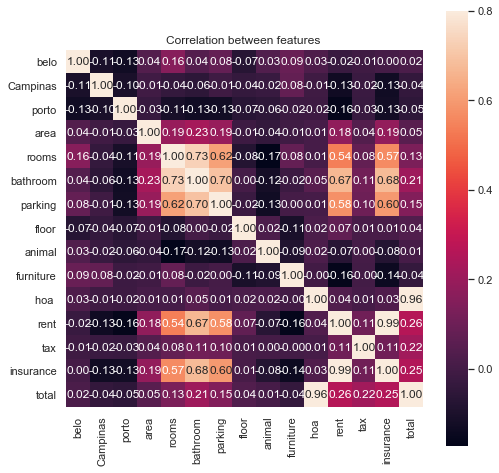

In [106]:
#Visulasing correleation with features
cormat=df.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cormat,vmax=0.8,square=True,annot=True,fmt='.2f')
plt.title("Correlation between features ")
plt.show()



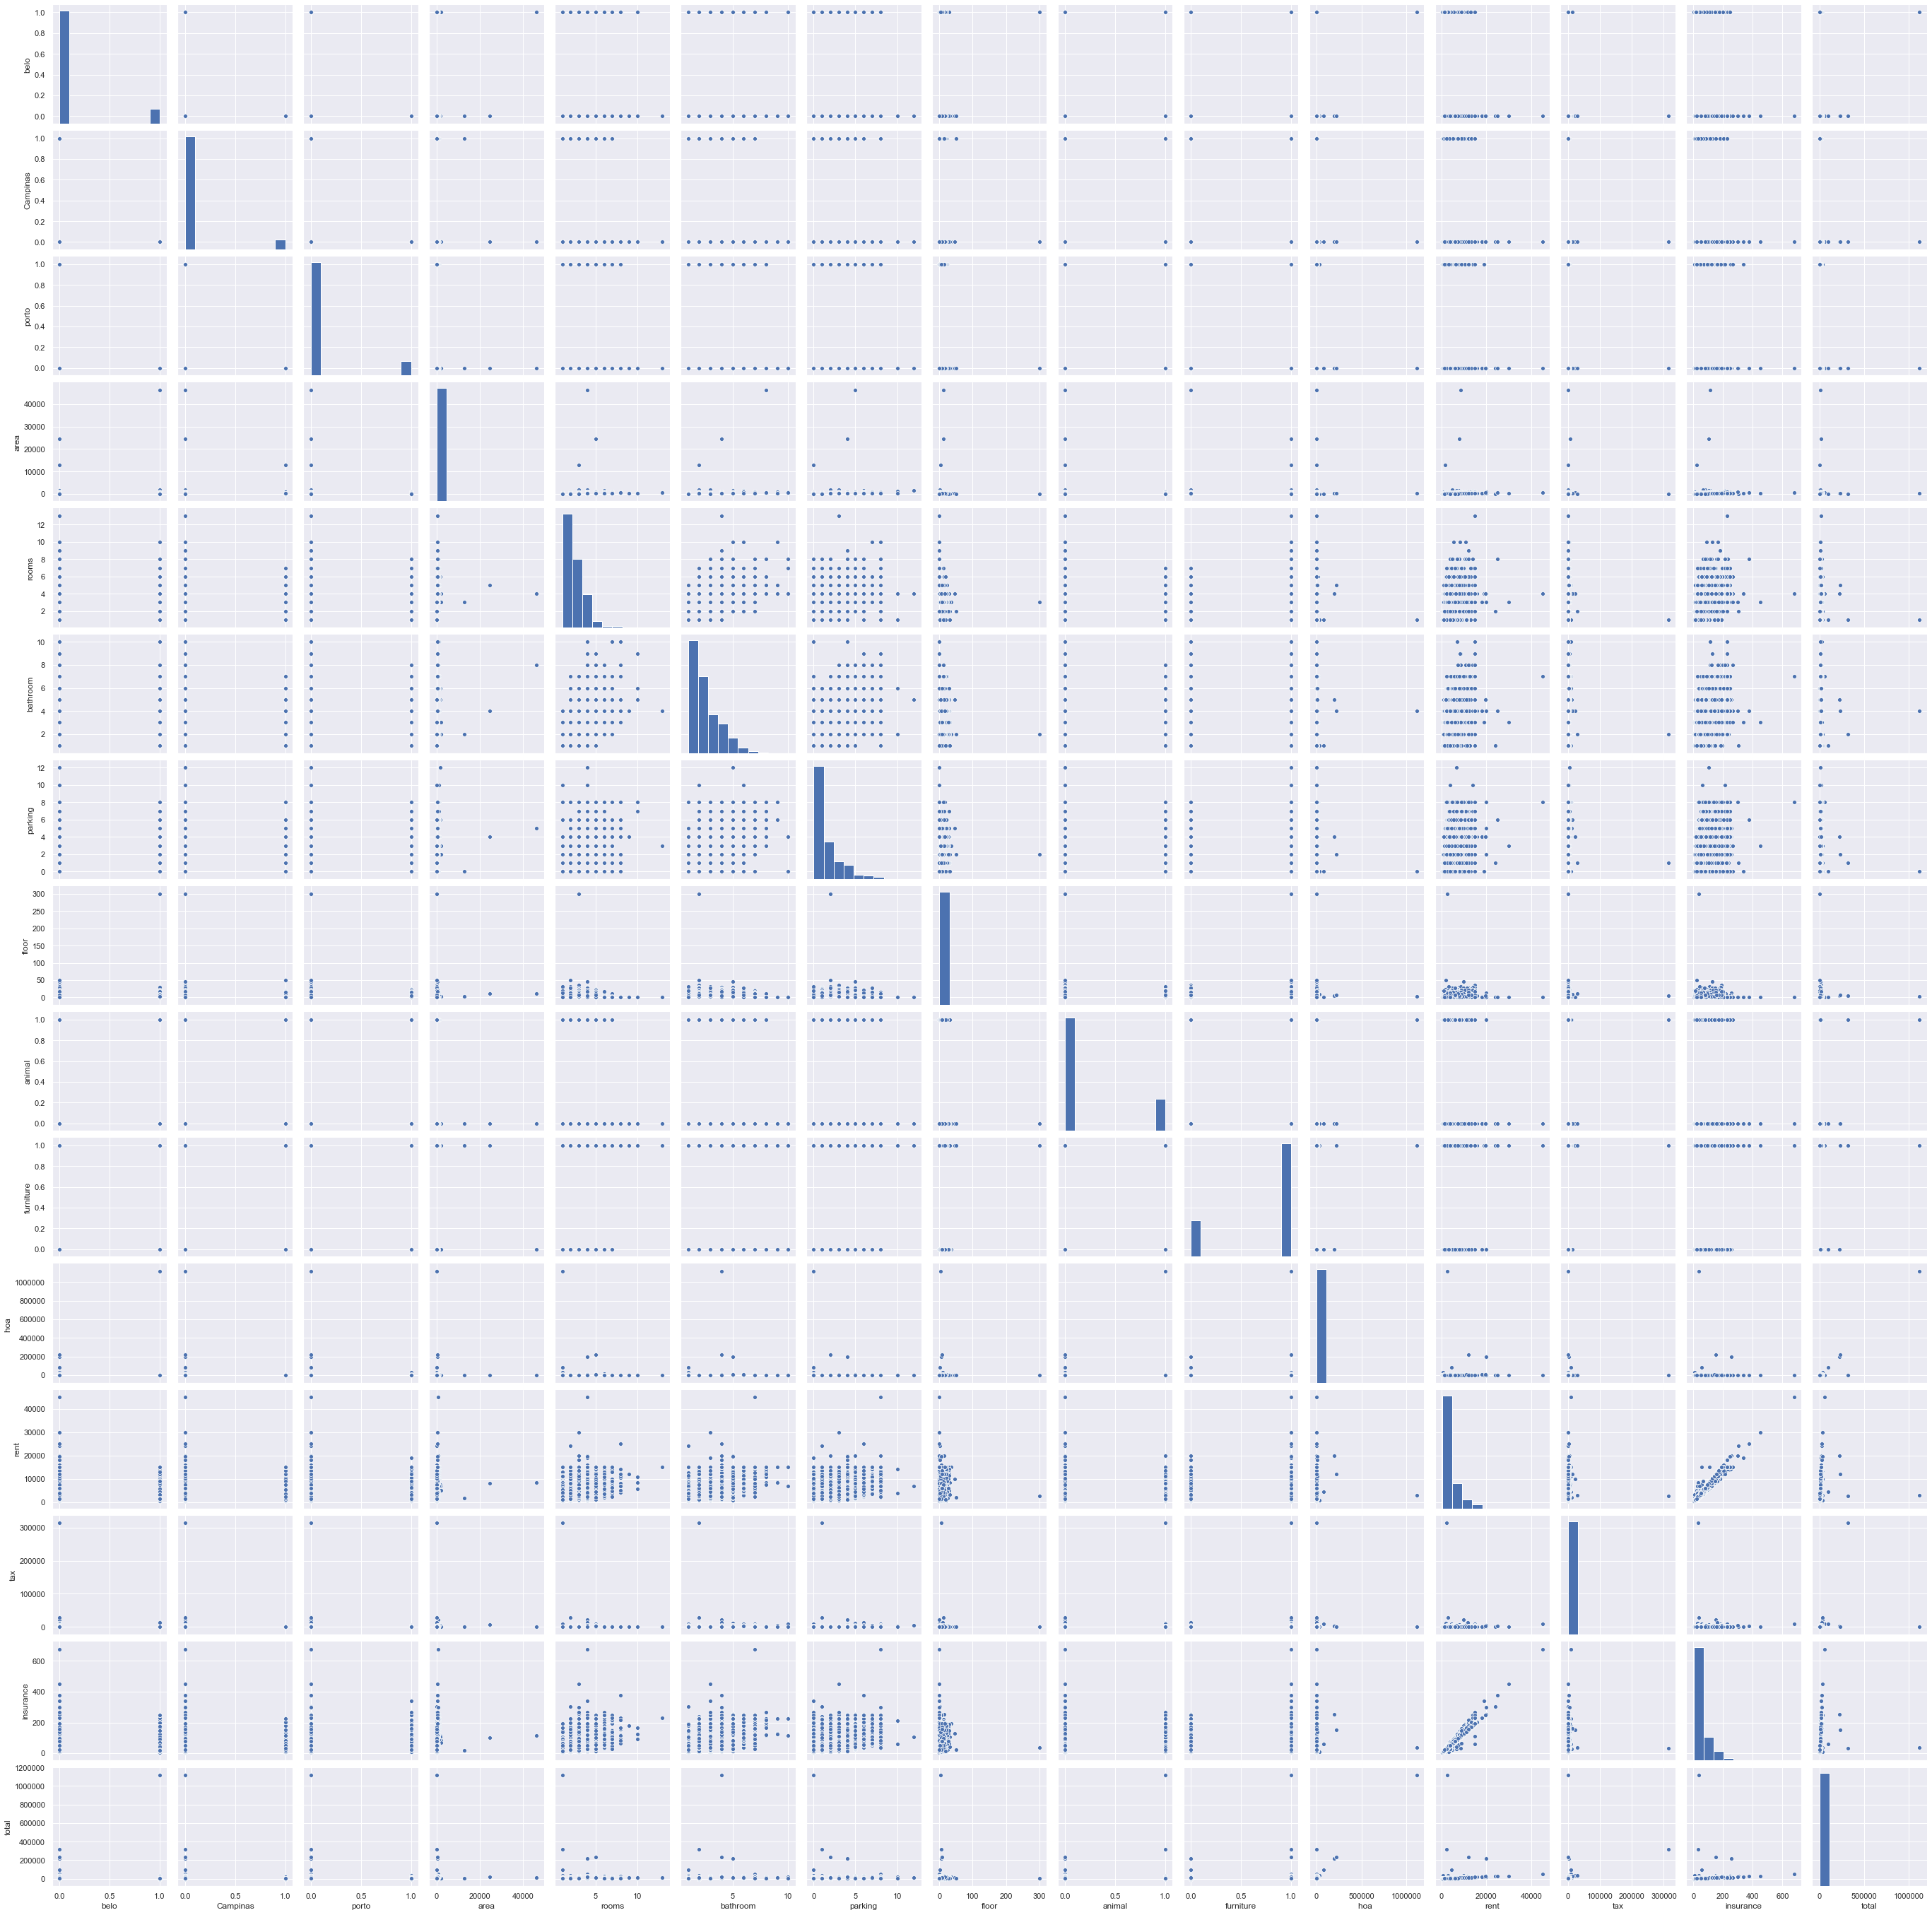

In [107]:
sns.pairplot(df)



In [108]:
df=df.drop('insurance',axis='columns')

In [109]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [110]:
X=df.drop('rent',axis=1)
Y=df['rent']

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [112]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
reg.score(x_test,y_test)

0.9999964772302469

In [114]:
y_pred=reg.predict(x_test)

In [115]:
residual=y_test-y_pred

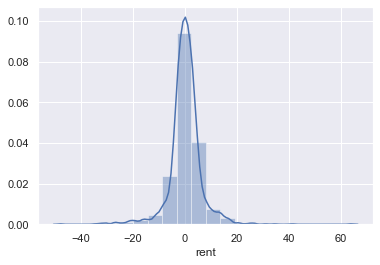

In [116]:
sns.distplot(residual,bins=20)

In [117]:
np.mean(residual)

0.1993576596646625

In [118]:
mode=df.mode()

mode

,belo,Campinas,porto,area,rooms,bathroom,parking,floor,animal,furniture,hoa,rent,tax,total
0,0,0,0,50,3,1,1,0,0,1,0,2500,0,2555


In [119]:
mean=df.mean()
mean

belo            0.117658
Campinas        0.079779
porto           0.111579
area          149.217920
rooms           2.506079
bathroom        2.236813
parking         1.609147
floor           5.067995
animal          0.222222
furniture       0.756266
hoa          1174.021698
rent         3896.247194
tax           366.704358
total        5490.487000
dtype: float64